In [2]:
import os # operating system
import numpy as np # mathematical calculation
import pandas as pd # manupulation package or import / export
import matplotlib.pyplot as plt # data visulization
import seaborn as sns # data viz + stats
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [21]:
dataset = pd.read_excel('Employee_Data.xls')
dataset.head()

,Employee Id,First Name,Last Name,Department,Age,Experience,Salary
0,1,Joy,Bass,Sales and Marketing,28.0,3.0,32889
1,2,Sheila,Garza,Sales and Marketing,22.0,1.0,15944
2,3,John,Bryant,Customer Relations,22.0,1.0,40343
3,4,Christian,Farley,Customer Relations,22.0,1.0,19018
4,5,Colorado,Bowen,Accounting,27.0,0.0,24795


In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Employee Id  100 non-null    int64  
 1   First Name   100 non-null    object 
 2   Last Name    100 non-null    object 
 3   Department   81 non-null     object 
 4   Age          82 non-null     float64
 5   Experience   90 non-null     float64
 6   Salary       100 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 5.6+ KB


In [23]:
dataset.isnull().sum()/len(dataset)*100

Employee Id     0.0
First Name      0.0
Last Name       0.0
Department     19.0
Age            18.0
Experience     10.0
Salary          0.0
dtype: float64

In [24]:
dataset['Department'].value_counts()

Sales and Marketing    30
Accounting             27
Customer Relations     24
Name: Department, dtype: int64

In [25]:
dataset['Department'] = dataset['Department'].fillna('Sales and Marketing')

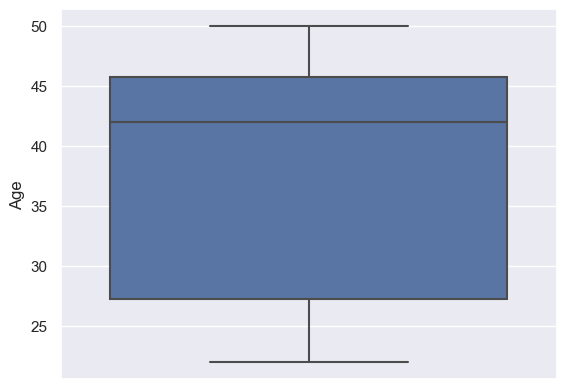

In [26]:
sns.boxplot(y='Age', data=dataset)
plt.show()

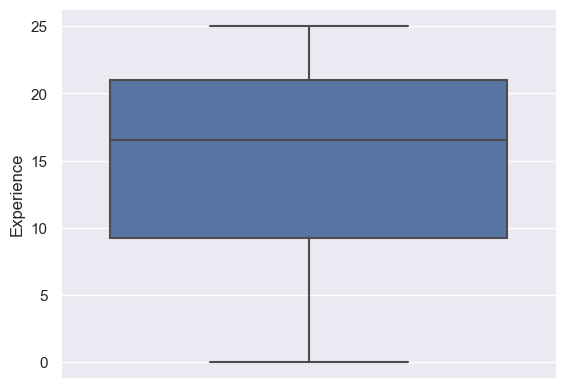

In [27]:
sns.boxplot(y='Experience', data=dataset)
plt.show()

In [28]:
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].mean())

In [29]:
dataset['Experience'] = dataset['Experience'].fillna(dataset['Experience'].mean())

In [30]:
dataset.isnull().sum()

Employee Id    0
First Name     0
Last Name      0
Department     0
Age            0
Experience     0
Salary         0
dtype: int64

# Encoding Concept

### Approach 1 : Label encoder

In [17]:
dataset['Department'].value_counts()

Sales and Marketing    49
Accounting             27
Customer Relations     24
Name: Department, dtype: int64

In [18]:
dataset['Department'] = dataset['Department'].astype('category')
dataset['Department'] = dataset['Department'].cat.codes

In [19]:
dataset['Department'].value_counts()

2    49
0    27
1    24
Name: Department, dtype: int64

In [20]:
dataset.head()

,Employee Id,First Name,Last Name,Department,Age,Experience,Salary
0,1,Joy,Bass,2,28.0,3.0,32889
1,2,Sheila,Garza,2,22.0,1.0,15944
2,3,John,Bryant,1,22.0,1.0,40343
3,4,Christian,Farley,1,22.0,1.0,19018
4,5,Colorado,Bowen,0,27.0,0.0,24795


### Approach no 2 : One Hot Encoder

In [31]:
dataset.head()

,Employee Id,First Name,Last Name,Department,Age,Experience,Salary
0,1,Joy,Bass,Sales and Marketing,28.0,3.0,32889
1,2,Sheila,Garza,Sales and Marketing,22.0,1.0,15944
2,3,John,Bryant,Customer Relations,22.0,1.0,40343
3,4,Christian,Farley,Customer Relations,22.0,1.0,19018
4,5,Colorado,Bowen,Accounting,27.0,0.0,24795


In [32]:
dataset = pd.get_dummies(dataset, columns=['Department'])

In [33]:
dataset.head(10)

,Employee Id,First Name,Last Name,Age,Experience,Salary,Department_Accounting,Department_Customer Relations,Department_Sales and Marketing
0,1,Joy,Bass,28.0,3.0,32889,0,0,1
1,2,Sheila,Garza,22.0,1.0,15944,0,0,1
2,3,John,Bryant,22.0,1.0,40343,0,1,0
3,4,Christian,Farley,22.0,1.0,19018,0,1,0
4,5,Colorado,Bowen,27.0,0.0,24795,1,0,0
5,6,Elijah,Matthews,26.0,5.0,15387,1,0,0
6,7,Bo,Mcleod,24.0,6.0,34117,0,1,0
7,8,Zena,Melendez,29.0,2.0,16099,0,1,0
8,9,Tucker,Michael,29.0,5.0,42105,0,0,1
9,10,Lucas,Rowe,30.0,6.0,11891,0,1,0


In [34]:
dataset.shape

(100, 9)

### Dummy variables (n-1)

In [35]:
dataset = dataset.iloc[:,0:8] # slicing (0:8) , 0 is the first place and 8 is end point
# in python, end point will not consider hence we got 0 to 7 columns

In [36]:
dataset.head()

,Employee Id,First Name,Last Name,Age,Experience,Salary,Department_Accounting,Department_Customer Relations
0,1,Joy,Bass,28.0,3.0,32889,0,0
1,2,Sheila,Garza,22.0,1.0,15944,0,0
2,3,John,Bryant,22.0,1.0,40343,0,1
3,4,Christian,Farley,22.0,1.0,19018,0,1
4,5,Colorado,Bowen,27.0,0.0,24795,1,0


In [37]:
dataset.describe()

,Employee Id,Age,Experience,Salary,Department_Accounting,Department_Customer Relations
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,37.975610,14.766667,65066.760000,0.270000,0.240000
std,29.011492,8.606992,6.532050,26189.874212,0.446196,0.429235
min,1.000000,22.000000,0.000000,11830.000000,0.000000,0.000000
25%,25.750000,30.000000,10.000000,48526.000000,0.000000,0.000000
50%,50.500000,39.500000,15.000000,73500.500000,0.000000,0.000000
75%,75.250000,44.250000,20.000000,86621.250000,1.000000,0.000000
max,100.000000,50.000000,25.000000,98180.000000,1.000000,1.000000


In [38]:
dataset_1 = dataset.copy()

In [39]:
dataset_1.head()

,Employee Id,First Name,Last Name,Age,Experience,Salary,Department_Accounting,Department_Customer Relations
0,1,Joy,Bass,28.0,3.0,32889,0,0
1,2,Sheila,Garza,22.0,1.0,15944,0,0
2,3,John,Bryant,22.0,1.0,40343,0,1
3,4,Christian,Farley,22.0,1.0,19018,0,1
4,5,Colorado,Bowen,27.0,0.0,24795,1,0


In [40]:
dataset_1.to_csv("Lavanya.csv")

# Feature Scaling

# Approach no 1 - Normalization

In [41]:
dataset1 = dataset.copy()

In [44]:
dataset1 = dataset1.iloc[:,3:6]
dataset1.head()

,Age,Experience,Salary
0,28.0,3.0,32889
1,22.0,1.0,15944
2,22.0,1.0,40343
3,22.0,1.0,19018
4,27.0,0.0,24795


In [45]:
from sklearn.preprocessing import Normalizer
x_nor = Normalizer()
x_norm = x_nor.fit_transform(dataset1)

In [47]:
x_norm 

array([[8.51348163e-04, 9.12158746e-05, 9.99999633e-01],
       [1.37982809e-03, 6.27194585e-05, 9.99999046e-01],
       [5.45323767e-04, 2.47874439e-05, 9.99999851e-01],
       [1.15679805e-03, 5.25817294e-05, 9.99999330e-01],
       [1.08892857e-03, 0.00000000e+00, 9.99999407e-01],
       [1.68973559e-03, 3.24949152e-04, 9.99998520e-01],
       [7.03461432e-04, 1.75865358e-04, 9.99999737e-01],
       [1.80135118e-03, 1.24231116e-04, 9.99998370e-01],
       [6.88754136e-04, 1.18750713e-04, 9.99999756e-01],
       [2.52290814e-03, 5.04581628e-04, 9.99996690e-01],
       [7.49560136e-04, 1.44146180e-04, 9.99999709e-01],
       [1.10408014e-03, 2.54787726e-04, 9.99999358e-01],
       [8.24458656e-04, 1.71762220e-04, 9.99999645e-01],
       [6.57992977e-04, 5.98175434e-05, 9.99999782e-01],
       [2.11326656e-03, 2.53591987e-04, 9.99997735e-01],
       [5.67343574e-04, 3.35110938e-04, 9.99999783e-01],
       [1.65837148e-03, 1.11311904e-03, 9.99998005e-01],
       [1.50321459e-03, 8.87898

In [48]:
dataset_nor = pd.DataFrame(x_norm)

In [51]:
dataset2 = dataset.copy()
dataset2 = dataset2.iloc[:,3:6]
dataset2.head()

,Age,Experience,Salary
0,28.0,3.0,32889
1,22.0,1.0,15944
2,22.0,1.0,40343
3,22.0,1.0,19018
4,27.0,0.0,24795


# Standarization

In [53]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
dataset_std = std_scaler.fit_transform(dataset2)

In [54]:
dataset_std

array([[-1.16485118e+00, -1.81044925e+00, -1.23482325e+00],
       [-1.86547071e+00, -2.11817433e+00, -1.88508853e+00],
       [-1.86547071e+00, -2.11817433e+00, -9.48775604e-01],
       [-1.86547071e+00, -2.11817433e+00, -1.76712361e+00],
       [-1.28162110e+00, -2.27203688e+00, -1.54543093e+00],
       [-1.39839102e+00, -1.50272416e+00, -1.90646343e+00],
       [-1.63193087e+00, -1.34886162e+00, -1.18769869e+00],
       [-1.04808125e+00, -1.96431179e+00, -1.87914039e+00],
       [-1.04808125e+00, -1.50272416e+00, -8.81158761e-01],
       [-9.31311332e-01, -1.34886162e+00, -2.04062262e+00],
       [-1.39839102e+00, -1.50272416e+00, -1.16582491e+00],
       [-1.39839102e+00, -1.34886162e+00, -1.59324625e+00],
       [-1.63193087e+00, -1.50272416e+00, -1.37984258e+00],
       [-1.86547071e+00, -1.96431179e+00, -1.21387047e+00],
       [-1.51516094e+00, -1.81044925e+00, -2.04296350e+00],
       [-1.51516094e+00,  2.73314780e-16, -8.05943657e-01],
       [-1.86547071e+00,  2.73314780e-16

In [55]:
pd.DataFrame(dataset_std)

,0,1,2
0,-1.164851,-1.810449,-1.234823
1,-1.865471,-2.118174,-1.885089
2,-1.865471,-2.118174,-0.948776
3,-1.865471,-2.118174,-1.767124
4,-1.281621,-2.272037,-1.545431
...,...,...,...
95,1.053777,1.112939,0.537644
96,0.937007,0.805214,0.618615
97,0.703468,0.497489,0.720693
98,1.053777,1.112939,0.924503
